# 2017-2019 Viviendas Leon Farming Data Exporation and Visualizations

## Background Information

Fruit Crops
- Banano
- Calala
- Granadilla
- Guayaba
- Melon
- Papya
- Palatano
- Sandia
- Tomata
- Piña
- Jamaica (Flor)

Calidad
- Pobre: Crop is unusable, either to be consumed or sold
- Promedio: Crop is usable, but should be carefully maintained in order to prevent a loss
- Bueno: Crop is usable and not in danger, but could still be improved
- Excelente: Crop is usable and all recommendations have been followed

% Enfermedad
- Percent diseased

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Upload Data and Constants

In [ ]:
misc_cols = ["Fecha Visita", "Auditor", "Unnamed: 2", "Comunidad", "Familia visitada", "Presente?"]
fruit_cols = ["Fruta", "Fruta Estado", "Fruta % Enfermedad", "Fruta Calidad", "Unnamed", "Fruta Plaga", "Fruta Recomendacion Organico", "Fruta Recomendacion Quimico"]
vegetable_cols = ["Vegetal", "Vegetal Estado", "Vegetal % Enfermedad", "Vegetal Calidad", "Unnamed", "Vegetal Plaga", "Vegetal Recomendacion Organico", "Vegetal Recomendacion Quimico"]
legume_cols = ["Leguminosa y Semilla", "Leguminosa y Semilla Estado", "Leguminosa y Semilla % Enfermedad", "Leguminosa y Semilla Calidad", "Unnamed", "Leguminosa y Semilla Plaga", "Leguminosa y Semilla Recomendacion Organico", "Leguminosa y Semilla Recomendacion Quimico"]
grain_cols = ["Gramínea", "Gramínea Estado", "Gramínea % Enfermedad", "Gramínea Calidad", "Unnamed", "Gramínea Plaga", "Gramínea Recomendacion Organico", "Gramínea Recomendacion Quimico"]

all_data = pd.read_csv("2017-2019.csv")
all_data.head()

,Fecha Visita,Auditor,Unnamed: 2,Comunidad,Familia visitada,Presente?,Fruta,Fruta Estado,Fruta % Enfermedad,Fruta Calidad,Unnamed,Fruta Plaga,Fruta Recomendacion Organico,Fruta Recomendacion Quimico,Vegetal,Vegetal Estado,Vegetal % Enfermedad,Vegetal Calidad,Vegetal Plaga,Vegetal Recomendacion Organico,Vegetal Recomendacion Quimico,Leguminosa y Semilla,Leguminosa y Semilla Estado,Leguminosa y Semilla % Enfermedad,Leguminosa y Semilla Calidad,Leguminosa y Semilla Plaga,Leguminosa y Semilla Recomendacion Organico,Leguminosa y Semilla Recomendacion Quimico,Gramínea,Gramínea Estado,Gramínea % Enfermedad,Gramínea Calidad,Gramínea Plaga,Gramínea Recomendacion Organico,Gramínea Recomendacion Quimico,Comentarios/Observaciones Adicionales,Respuesta/Seguimiento a comentarios,Unnamed: 37
0,"November 6, 2017",Lesbia/Camilo,Troilo,Troilo,Ricardo Javier Mendoza Arévalo,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chiltoma,Transplantado,2,Bueno,Mosca blanca,NaN,Triple 15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,El almacigo de cebolla se lo dañaron las gall...,NaN,NaN
1,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Rita Arévalo Mora,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chiltoma,Transplantado,5,Promedio,Trip,Ace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Rita Arévalo Mora,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pepino,Transplantado,6,Pobre,Mosca blanca,Ace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Karla Galiano Martínez,Si,Calala,Transplantado,3.0,Bueno,NaN,NaN,NaN,NaN,Chiltoma,Transplantado,2,Bueno,NaN,Ace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maiz,Transplantado,NaN,Bueno,NaN,NaN,NaN,NaN,NaN,NaN
4,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Karla Galiano Martínez,Si,Papaya,Transplantado,2.0,Bueno,NaN,NaN,NaN,NaN,Pepino,Transplantado,35 %,Pobre,Mildiu,Bicarbonato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysis of Fruit Crops

In [ ]:
fruit_data = all_data[misc_cols + fruit_cols].copy()
fruit_data.head()

,Fecha Visita,Auditor,Unnamed: 2,Comunidad,Familia visitada,Presente?,Fruta,Fruta Estado,Fruta % Enfermedad,Fruta Calidad,Unnamed,Fruta Plaga,Fruta Recomendacion Organico,Fruta Recomendacion Quimico
0,"November 6, 2017",Lesbia/Camilo,Troilo,Troilo,Ricardo Javier Mendoza Arévalo,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Rita Arévalo Mora,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Rita Arévalo Mora,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Karla Galiano Martínez,Si,Calala,Transplantado,3.0,Bueno,NaN,NaN,NaN,NaN
4,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Karla Galiano Martínez,Si,Papaya,Transplantado,2.0,Bueno,NaN,NaN,NaN,NaN


In [ ]:
# Look for and correct typos in first two columns
fruit_data["Fruta"] = (fruit_data["Fruta"].replace("piña", "Pina")).replace("Sandia y melon", "Sandia")

print(fruit_data["Fruta"].value_counts(), '\n')
print(fruit_data["Fruta Calidad"].value_counts(), '\n')

Tomate        498
Papaya        431
Plátano       222
Melon         105
Sandia         89
Calala         89
Piña           21
Guayaba        16
Granadilla     13
Jamaica        10
Verenjena       3
Pina            2
Name: Fruta, dtype: int64 

Bueno        792
Excelente    189
Promedio     155
Pobre         17
Name: Fruta Calidad, dtype: int64 



### Fruit Crop Illness and Quality

In [ ]:
fruit_disease = fruit_data[["Fruta", "Fruta % Enfermedad"]].dropna()
fruit_quality = fruit_data[["Fruta", "Fruta Calidad"]].dropna()

#### Fruit Disease

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

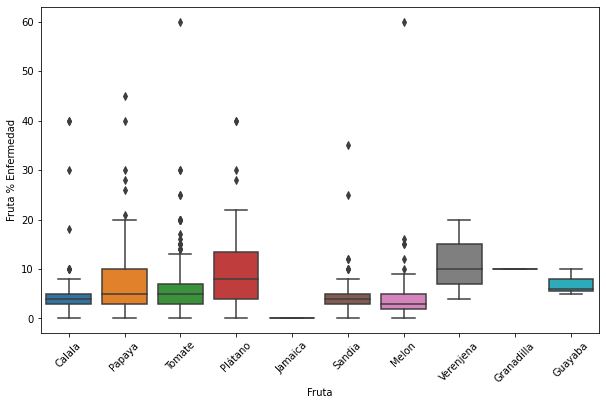

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="Fruta", y="Fruta % Enfermedad", data=fruit_disease)
plt.xticks(rotation=45)

#### Fruit Quality Distributions

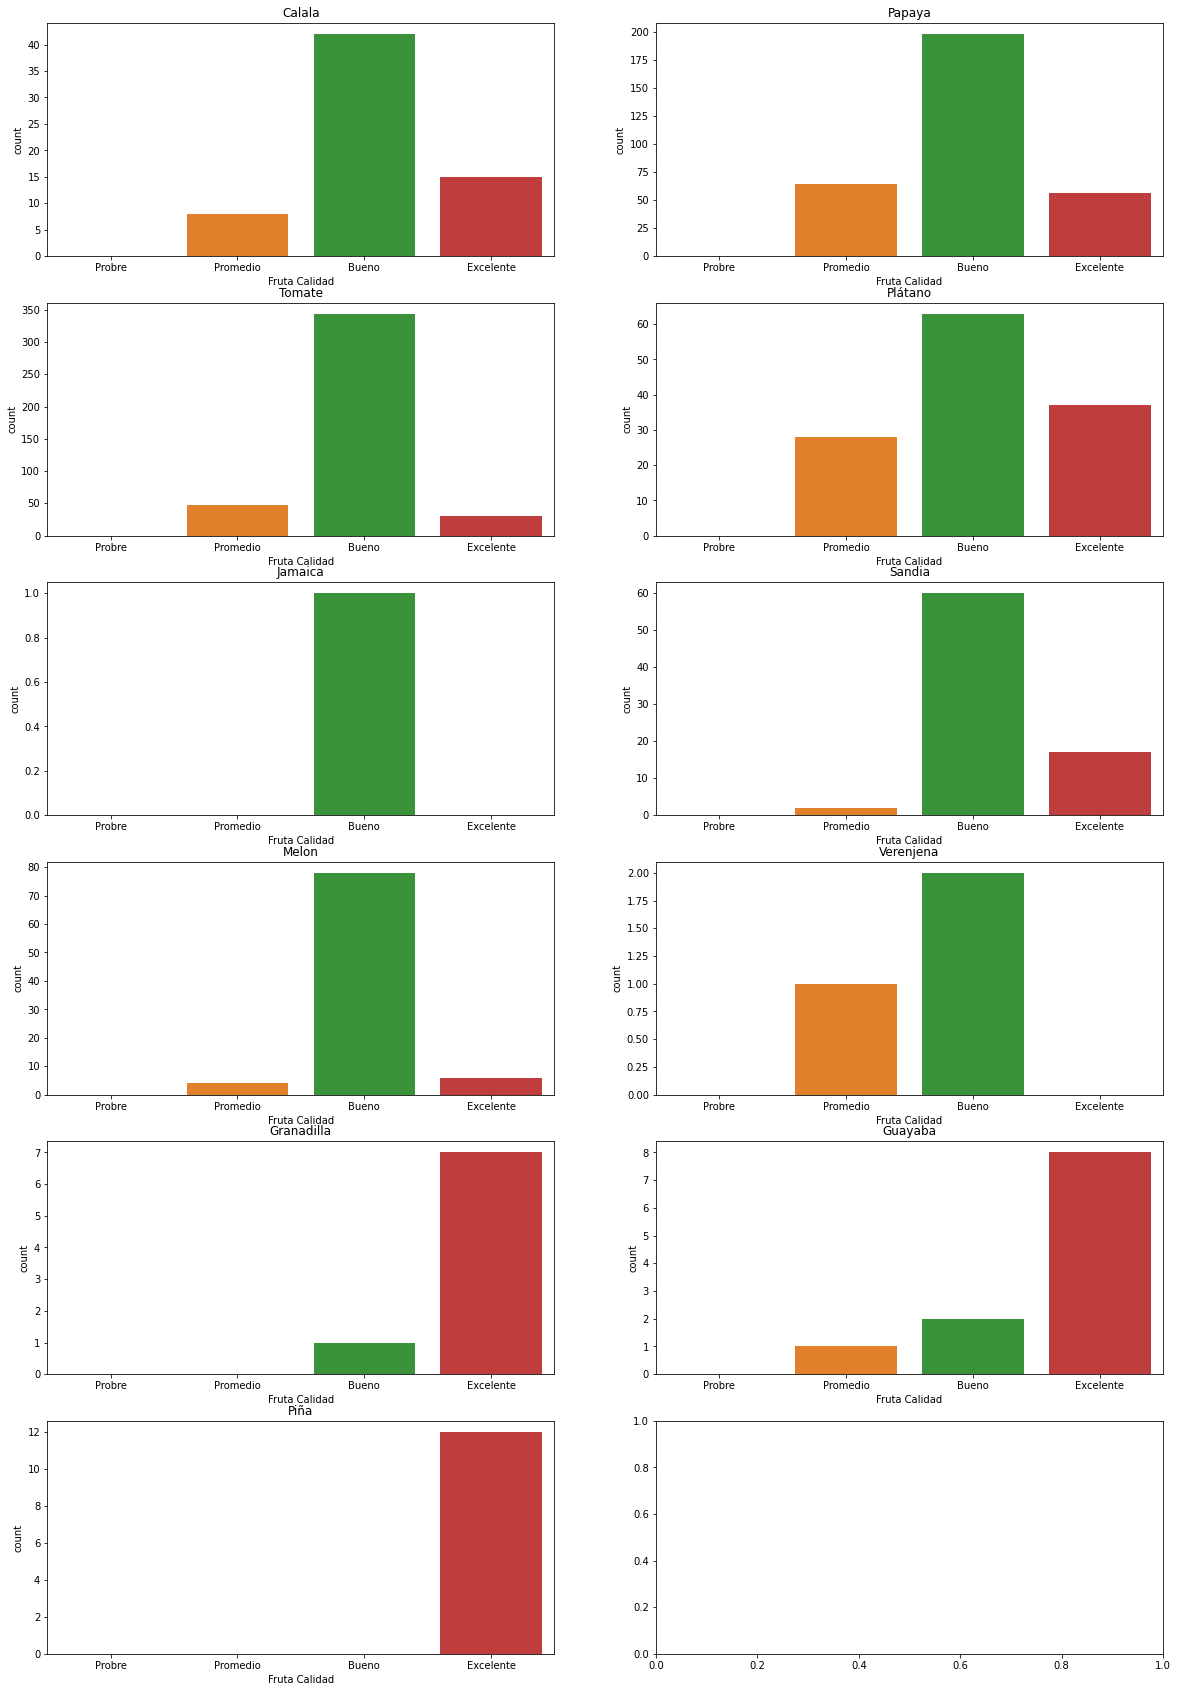

In [ ]:
fig, ax = plt.subplots(6, 2, figsize=(20, 30))
count1 = 0
count2 = 0
for fruit in fruit_quality["Fruta"].unique():
  if count2 == 2:
    count1 += 1
    count2 = 0
  data = fruit_quality[fruit_quality["Fruta"] == fruit]
  g = sns.countplot(x="Fruta Calidad", data=data, ax=ax[count1, count2], order=["Probre", "Promedio", "Bueno", "Excelente"])
  g.set_title(fruit)
  count2 += 1
fig.show()

## Analysis of Vegetable Crops

In [ ]:
vegetable_data = all_data[misc_cols + vegetable_cols].copy()
vegetable_data.head()

,Fecha Visita,Auditor,Unnamed: 2,Comunidad,Familia visitada,Presente?,Vegetal,Vegetal Estado,Vegetal % Enfermedad,Vegetal Calidad,Unnamed,Vegetal Plaga,Vegetal Recomendacion Organico,Vegetal Recomendacion Quimico
0,"November 6, 2017",Lesbia/Camilo,Troilo,Troilo,Ricardo Javier Mendoza Arévalo,Si,Chiltoma,Transplantado,2,Bueno,NaN,Mosca blanca,NaN,Triple 15
1,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Rita Arévalo Mora,No,Chiltoma,Transplantado,5,Promedio,NaN,Trip,Ace,NaN
2,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Rita Arévalo Mora,No,Pepino,Transplantado,6,Pobre,NaN,Mosca blanca,Ace,NaN
3,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Karla Galiano Martínez,Si,Chiltoma,Transplantado,2,Bueno,NaN,NaN,Ace,NaN
4,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Karla Galiano Martínez,Si,Pepino,Transplantado,35 %,Pobre,NaN,Mildiu,Bicarbonato,NaN


In [ ]:
vegetable_data["Vegetal"] = vegetable_data["Vegetal"].replace({"Verengena": "Berenjena", "Verenjena": "Berenjena", "verengena": "Berenjena", "Verngena": "Berenjena", "verenjena": "Berenjena"})
vegetable_data = vegetable_data[(vegetable_data["Vegetal"] != "Pipian") & (vegetable_data["Vegetal"] != "Tomate")]

print(vegetable_data["Vegetal"].value_counts(), '\n')
print(vegetable_data["Vegetal Calidad"].value_counts(), '\n')

Chiltoma     621
Yuca         170
Ayote        122
Cebolla       86
Pepino        52
Berenjena     15
Rábano         9
Camote         2
Chile          2
Name: Vegetal, dtype: int64 

Bueno        654
Excelente    147
Promedio      82
Pobre         22
Name: Vegetal Calidad, dtype: int64 



### Vegetable Crop Illness and Quality

In [ ]:
vegetable_disease = vegetable_data[["Vegetal", "Vegetal % Enfermedad"]].dropna()
vegetable_disease["Vegetal % Enfermedad"] = vegetable_disease["Vegetal % Enfermedad"].apply(lambda x: float((x[:3].strip(';')).strip(' ')))
vegetable_quality = vegetable_data[["Vegetal", "Vegetal Calidad"]].dropna()

#### Vegetable Disease

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

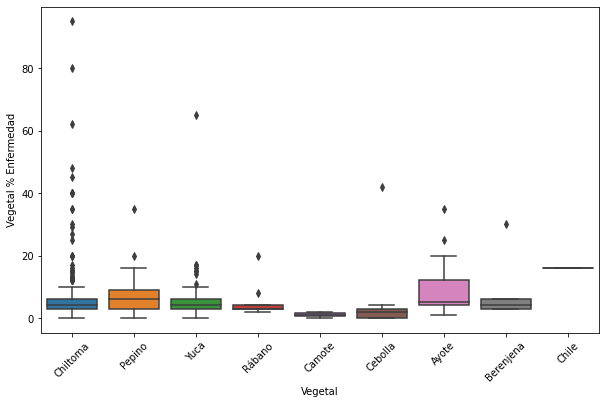

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="Vegetal", y="Vegetal % Enfermedad", data=vegetable_disease)
plt.xticks(rotation=45)

#### Vegetable Quality Distributions

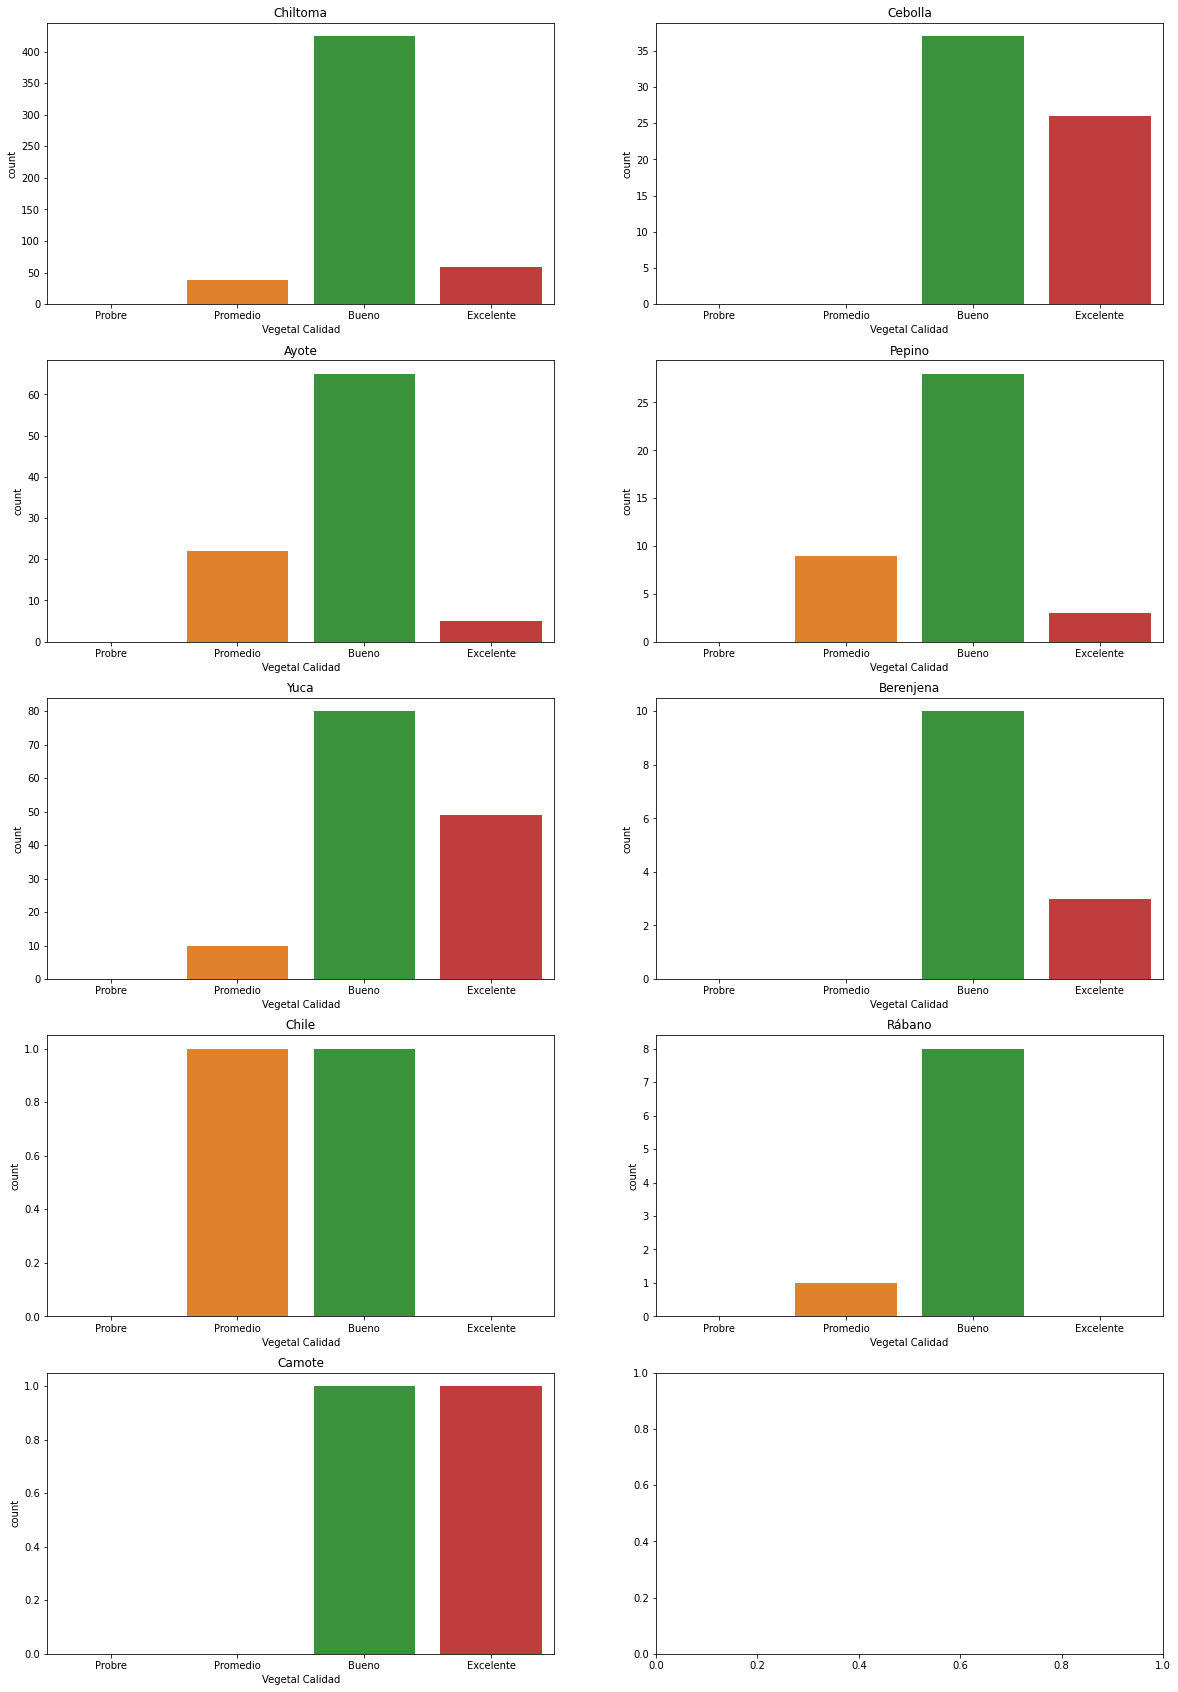

In [ ]:
fig, ax = plt.subplots(5, 2, figsize=(20, 30))
count = 0
for vegetable in vegetable_quality["Vegetal"].unique():
  data = vegetable_quality[vegetable_quality["Vegetal"] == vegetable]
  g = sns.countplot(x="Vegetal Calidad", data=data, ax=ax[count%5, count%2], order=["Probre", "Promedio", "Bueno", "Excelente"])
  g.set_title(vegetable)
  count += 1
fig.show()

## Analysis of Legume and Seed Crops

In [ ]:
legume_data = all_data[misc_cols + legume_cols].copy()
legume_data.head()

,Fecha Visita,Auditor,Unnamed: 2,Comunidad,Familia visitada,Presente?,Leguminosa y Semilla,Leguminosa y Semilla Estado,Leguminosa y Semilla % Enfermedad,Leguminosa y Semilla Calidad,Unnamed,Leguminosa y Semilla Plaga,Leguminosa y Semilla Recomendacion Organico,Leguminosa y Semilla Recomendacion Quimico
0,"November 6, 2017",Lesbia/Camilo,Troilo,Troilo,Ricardo Javier Mendoza Arévalo,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Rita Arévalo Mora,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Rita Arévalo Mora,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Karla Galiano Martínez,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Karla Galiano Martínez,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
legume_data = legume_data[(legume_data["Leguminosa y Semilla"] != "I")].replace({"Pipian": "Pipián"})
legume_data = legume_data[legume_data["Leguminosa y Semilla Calidad"] != "crisopa"]

print(legume_data["Leguminosa y Semilla"].value_counts(), '\n')
print(legume_data["Leguminosa y Semilla Calidad"].value_counts(), '\n')

Frijol de vara    292
Pipián            160
Ayote               5
Name: Leguminosa y Semilla, dtype: int64 

Bueno        287
Excelente     45
Promedio      25
Pobre          4
Name: Leguminosa y Semilla Calidad, dtype: int64 



### Legume and Seed Crop Illness and Quality

In [ ]:
legume_disease = legume_data[["Leguminosa y Semilla", "Leguminosa y Semilla % Enfermedad"]].dropna()
legume_quality = legume_data[["Leguminosa y Semilla", "Leguminosa y Semilla Calidad"]].dropna()

#### Legume and Seed Disease

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

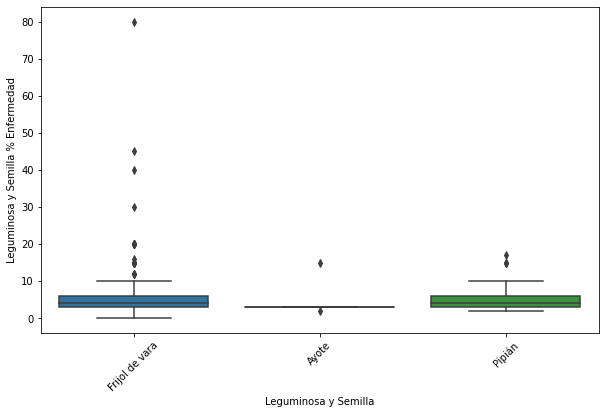

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="Leguminosa y Semilla", y="Leguminosa y Semilla % Enfermedad", data=legume_disease)
plt.xticks(rotation=45)

#### Legume and Seed Quality Distributions

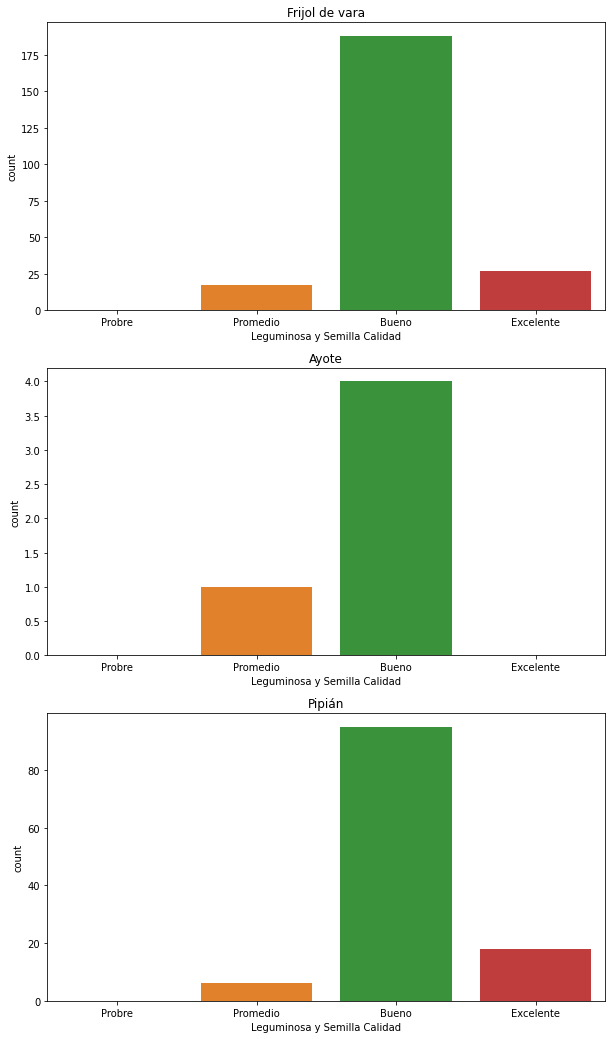

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 18))
count = 0
for legume in legume_quality["Leguminosa y Semilla"].unique():
  data = legume_quality[legume_quality["Leguminosa y Semilla"] == legume]
  g = sns.countplot(x="Leguminosa y Semilla Calidad", data=data, ax=ax[count], order=["Probre", "Promedio", "Bueno", "Excelente"])
  g.set_title(legume)
  count += 1
fig.show()

## Analysis of Grain Crops

In [ ]:
grain_data = all_data[misc_cols + grain_cols].copy()
grain_data.head()

,Fecha Visita,Auditor,Unnamed: 2,Comunidad,Familia visitada,Presente?,Gramínea,Gramínea Estado,Gramínea % Enfermedad,Gramínea Calidad,Unnamed,Gramínea Plaga,Gramínea Recomendacion Organico,Gramínea Recomendacion Quimico
0,"November 6, 2017",Lesbia/Camilo,Troilo,Troilo,Ricardo Javier Mendoza Arévalo,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Rita Arévalo Mora,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Rita Arévalo Mora,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Karla Galiano Martínez,Si,Maiz,Transplantado,NaN,Bueno,NaN,NaN,NaN,NaN
4,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Karla Galiano Martínez,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(grain_data["Gramínea"].value_counts(), '\n')
print(grain_data["Gramínea Calidad"].value_counts(), '\n')

NameError: ignored

### Grain Crop Illness and Quality

In [ ]:
grain_disease = grain_data[["Gramínea", "Gramínea % Enfermedad"]].dropna()
grain_quality = grain_data[["Gramínea", "Gramínea Calidad"]].dropna()

#### Grain Disease

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

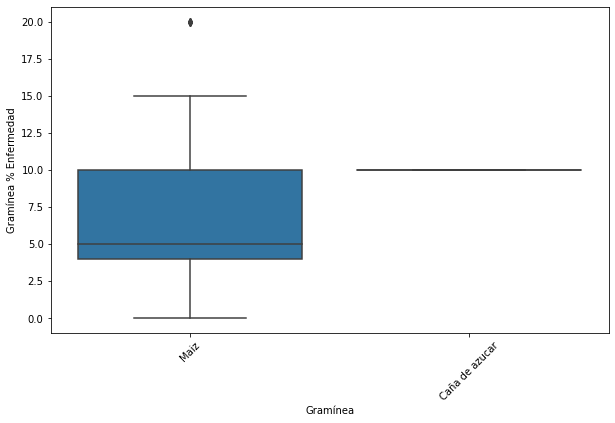

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="Gramínea", y="Gramínea % Enfermedad", data=grain_disease)
plt.xticks(rotation=45)

#### Grain Quality Distributions

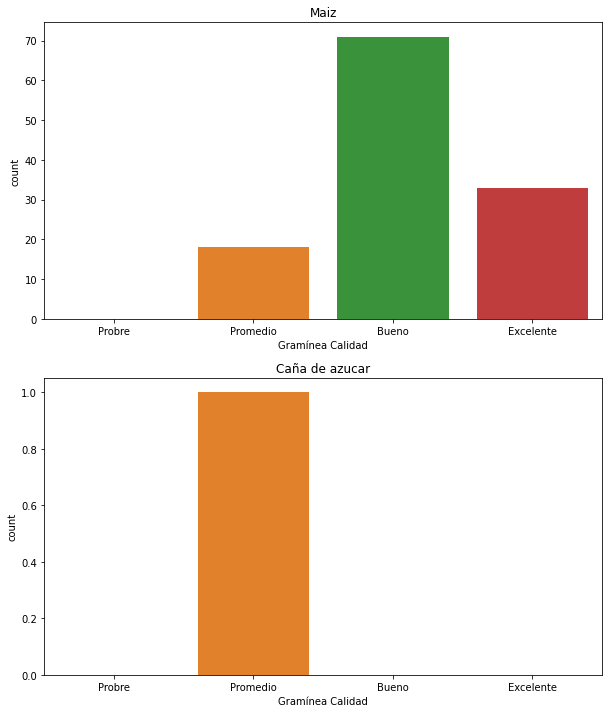

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 12))
count = 0
for grain in grain_quality["Gramínea"].unique():
  data = grain_quality[grain_quality["Gramínea"] == grain]
  g = sns.countplot(x="Gramínea Calidad", data=data, ax=ax[count], order=["Probre", "Promedio", "Bueno", "Excelente"])
  g.set_title(grain)
  count += 1
fig.show()